In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snp
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
Churn_Data=pd.read_csv('Telco-Customer-Churn.csv')

In [ ]:
Churn_Data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6663,0674-EYYZV,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,54.65,54.65,No
2361,5103-MHMHY,Female,0,No,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes
6221,0042-JVWOJ,Male,0,No,No,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.60,471.85,No
5150,7017-VFULY,Female,0,Yes,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.10,43.15,No
6432,8221-EQDGL,Male,0,Yes,No,35,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Mailed check,61.00,2130.45,No
4708,5181-OABFK,Female,0,Yes,Yes,56,Yes,No,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Credit card (automatic),61.30,3346.8,No
3099,5505-OVWQW,Female,0,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.15,353.65,No
374,6862-CQUMB,Male,0,No,No,37,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),96.10,3646.8,No
3329,5366-OBVMR,Female,0,Yes,No,18,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,908.75,No
6086,0916-KNFAJ,Male,0,Yes,No,61,Yes,Yes,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Mailed check,69.90,4226.7,No


In [ ]:
Churn_Data.drop('customerID',axis=1,inplace=True)

In [ ]:
Churn_Data.sample(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6703,Female,0,No,No,2,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,45.25,85.5,Yes
6483,Male,0,Yes,Yes,13,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,97.00,1334.45,No
621,Female,0,No,No,62,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,One year,Yes,Electronic check,92.05,5755.8,No
1023,Female,1,Yes,No,45,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,86.10,3861.45,No
4269,Male,0,Yes,No,17,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,No,Credit card (automatic),90.20,1454.15,Yes
6668,Female,0,No,No,38,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,103.65,3988.5,No
5453,Male,0,Yes,No,60,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Mailed check,61.35,3766.2,No
2688,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,78.75,412.1,Yes


In [ ]:
Churn_Data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Convert 'Total Charges' column from object to numerical
Churn_Data['Totalcharges']=pd.to_numeric(Churn_Data['TotalCharges'],errors='coerce')
print(Churn_Data.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Totalcharges        float64
dtype: object


In [ ]:
Churn_Data.shape

(7043, 21)

In [ ]:
Churn_Data.drop_duplicates()
Churn_Data.shape

(7043, 21)

In [ ]:
Churn_Data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
Totalcharges        11
dtype: int64

In [ ]:
# Replace empty strings or whitespace with NaN
Churn_Data['TotalCharges'].replace('', np.nan, inplace=True)
Churn_Data['TotalCharges'].replace(' ', np.nan, inplace=True)

# Drop rows with null values in the 'TotalCharges' column
Churn_Data.dropna(subset=['TotalCharges'], inplace=True)

print(Churn_Data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Totalcharges        0
dtype: int64


In [ ]:
Churn_Data.dropna(inplace=True)

print(Churn_Data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Totalcharges        0
dtype: int64


In [ ]:
Churn_Data.shape

(7032, 21)

#**EDA**

Text(0.5, 1.0, 'Customer churn Prediction visualization')

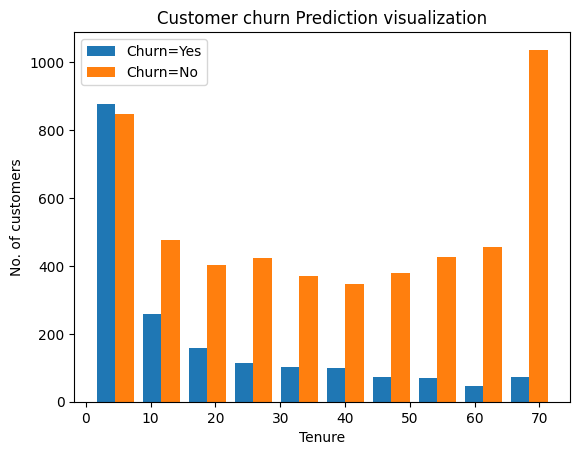

In [ ]:
tenure_churn_no=Churn_Data[Churn_Data.Churn=='No'].tenure
tenure_churn_yes=Churn_Data[Churn_Data.Churn=='Yes'].tenure
plt.hist([tenure_churn_yes,tenure_churn_no],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.title ('Customer churn Prediction visualization')

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

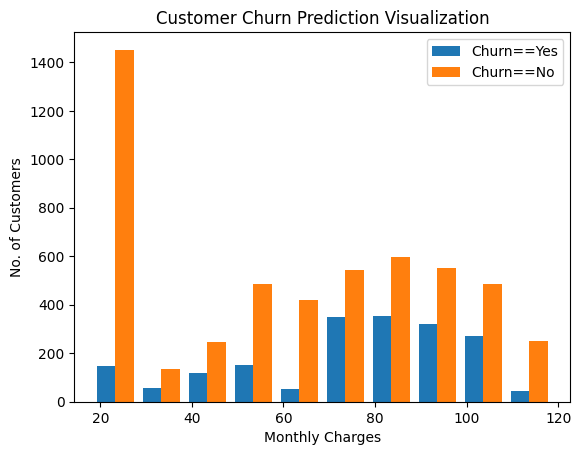

In [ ]:
monthly_charges_no=Churn_Data[Churn_Data.Churn=='No'].MonthlyCharges
monthly_charges_yes=Churn_Data[Churn_Data.Churn=='Yes'].MonthlyCharges
plt.hist([monthly_charges_yes,monthly_charges_no],
         label=['Churn==Yes','Churn==No'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Prediction Visualization')

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

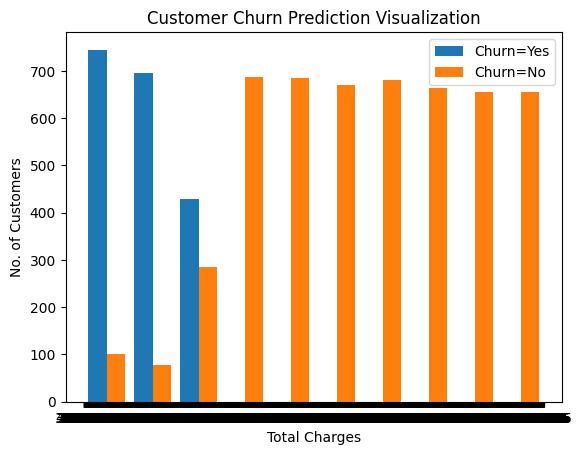

In [ ]:
Total_Charges_no=Churn_Data[Churn_Data.Churn=='No'].TotalCharges
Total_Charges_yes=Churn_Data[Churn_Data.Churn=='Yes'].TotalCharges
plt.hist([Total_Charges_yes,Total_Charges_no],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel('Total Charges')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Prediction Visualization')

In [ ]:
Churn_Data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
Totalcharges        6530
dtype: int64

In [ ]:
Churn_Data.replace('No phone service','No',inplace=True)
Churn_Data.replace('No internet service','No',inplace=True)
Churn_Data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Totalcharges'],
      dtype='object')

In [ ]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
  Churn_Data[col].replace({'Yes':1,
                           'No':0},
                          inplace=True)

In [ ]:
Churn_Data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
Churn_Data['Dependents'].unique()

array([0, 1])

In [ ]:
Churn_Data_1=pd.get_dummies(data=Churn_Data,
                            columns=['InternetService','Contract','PaymentMethod'])
Churn_Data_1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Totalcharges', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
Churn_Data_1.dtypes

gender                                      object
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
Totalcharges                               float64
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [ ]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
scaler=MinMaxScaler()
Churn_Data_1[col_to_scale]=scaler.fit_transform(Churn_Data_1[col_to_scale])

In [ ]:
Churn_Data_1[col_to_scale]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [ ]:
Churn_Data_1= pd.get_dummies(Churn_Data_1, columns=['gender'])
Churn_Data_1

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male
0,0,1,0,0.000000,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0.464789,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
2,0,0,0,0.014085,1,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1
3,0,0,0,0.619718,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
4,0,0,0,0.014085,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.323944,1,1,1,0,1,1,...,0,0,1,0,0,0,0,1,0,1
7039,0,1,1,1.000000,1,1,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
7040,0,1,1,0.140845,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
7041,1,1,0,0.042254,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [ ]:
X=Churn_Data_1.drop('Churn',
                    axis='columns')
y=Churn_Data_1['Churn']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(4922, 28)

In [ ]:
X_test.shape

(2110, 28)

In [ ]:
len(X_train.columns)

28

In [ ]:
# Feature scaling using Min-Max Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(28,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
154/154 [==============================] - 1s 1ms/step - loss: 5.1854 - accuracy: 0.6735
Epoch 2/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.7462
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6616 - accuracy: 0.7690
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.5778 - accuracy: 0.7761
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.7706
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7045 - accuracy: 0.7714
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.8446 - accuracy: 0.7639
Epoch 8/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7809 - accuracy: 0.7615
Epoch 9/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.7812
Epoch 10/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6951 - accura

In [ ]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 949us/step - loss: 0.6900 - accuracy: 0.6986


[0.6900379061698914, 0.6985781788825989]

In [ ]:
y_pred=model.predict(X_test)
y_pred[:2]

66/66 [==============================] - 0s 749us/step


array([[0.01115342],
       [0.22705288]], dtype=float32)

In [ ]:
y_test

2481    0
6784    0
6125    1
3052    0
4099    0
       ..
2763    0
6747    0
1700    0
1099    0
4720    0
Name: Churn, Length: 2110, dtype: int64

In [ ]:
y_prediction=[]
for elements in y_pred:
  if elements>0.5:
    y_prediction.append(1)
  else:
    y_prediction.append(0)
y_prediction[:5]

[0, 0, 1, 0, 0]

Text(95.72222222222221, 0.5, 'Truth')

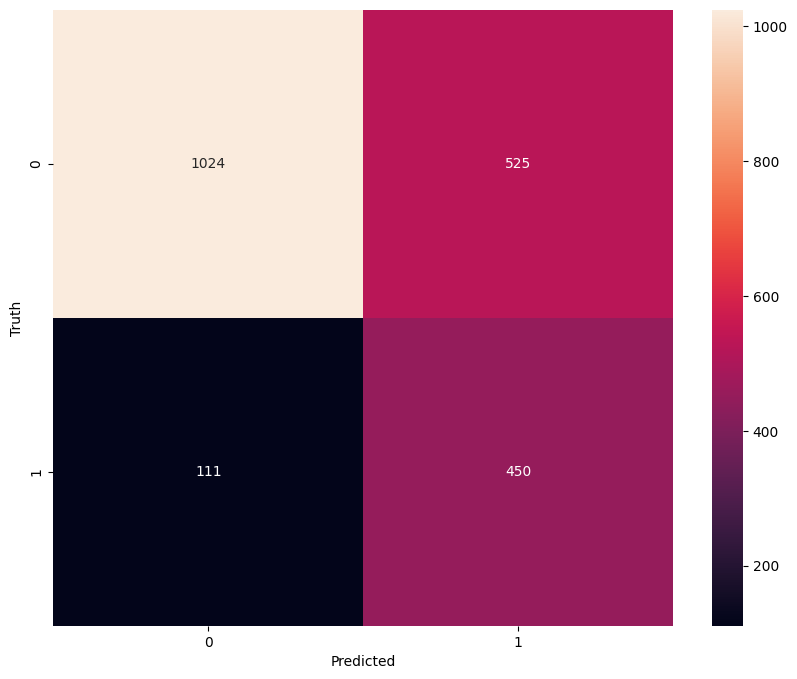

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,
                            predictions=y_prediction)
plt.figure(figsize=(10,8))
snp.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy

In [ ]:
round((873+222)/(873+222+186+126),2)

0.78

Precision for customers who did not churn

In [ ]:
round(873/(873+186),2)

0.82

Precision for customers who actually

In [ ]:
round(222/(222+126),2)

0.64

Recall for 0

In [ ]:
round(873/(873+126),2)

0.87

Recall for 1

In [ ]:
round(222/(222+186),2)

0.54